In [3]:
import pandas as pd
import seaborn as sns
import pprint
import matplotlib.pylab as plt

1. Load the csv file and show top 5 records from it.
2. How you would be able to see each column's name.
3. Need to show number of rows and columns of this dataset.
4. Show number of players and their countries.
5. If you find many records in point 4 then show only top 10 countries and their number of players.
6. Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.
7. Show top 5 players short name and wages.
8. Show top 5 players short name and wages that are getting highest salaries.
9. Create a bar plot of point number 8.   
10. Show top 10 records of Germany.
11. Now show top 5 records of Germany players who have maximum height, weight and wages.
12. Show short name and wages of top 5 Germany players.
13. Show top 5 players who have great shooting skills among all with short name.
14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.
15. Show wages records of top 5 players of 'Real Madrid' team.
16. Show shooting records of top 5 players of 'Real Madrid' team.
17. Show defending records of top 5 players of 'Real Madrid' team.
18. Show nationality records of top 5 players of 'Real Madrid' team

Bonus – Can go to beyond the scope of this project and find out some great results
from the data set. Extract more information of players according to your wish.

1. Load the csv file and show top 5 records from it.

In [4]:
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
df = df.dropna()

2. How you would be able to see each column's name.

In [24]:
df_columns = df.columns
pp = pprint.PrettyPrinter(compact=True)
pp.pprint(list(df_columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position',
 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing',
 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
 'movement_reactions', 'movement_balance', 'power_shot_po

3. Need to show number of rows and columns of this dataset.

In [29]:
print(f"Rows: {df.shape[0]}\nColumns: {df.shape[1]}")

Rows: 18278
Columns: 104


4. Show number of players and their countries.

In [32]:
df.groupby("nationality").count()["sofifa_id"]

nationality
Afghanistan            2
Albania               43
Algeria               50
Angola                16
Antigua & Barbuda      7
                    ... 
Venezuela             66
Vietnam                1
Wales                117
Zambia                10
Zimbabwe              12
Name: sofifa_id, Length: 162, dtype: int64

5. If you find many records in point 4 then show only top 10 countries and their number of players.

In [34]:
df.groupby("nationality").count()["sofifa_id"].nlargest(10)

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: sofifa_id, dtype: int64

6. Now you have to create a bar plot of top 5 countries and their number of players, try to fill green color in bars.

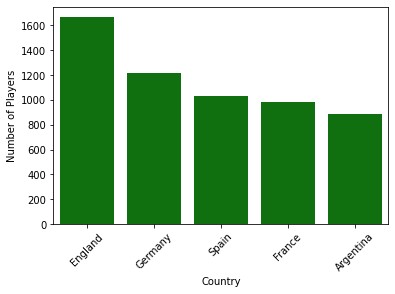

In [78]:
chart_data =df.groupby("nationality").count()[["sofifa_id"]].nlargest(5,"sofifa_id")
indexes = chart_data.index
values = df.groupby("nationality").count()[["sofifa_id"]].nlargest(5,"sofifa_id").values.flatten()
p = sns.barplot(
    x=indexes,
    y=values,
    color="green"
)
p.set_xlabel("Country")
p.set_ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()

7. Show top 5 players short name and wages.

In [65]:
df[["short_name","wage_eur","overall"]].nlargest(5,"overall")

,short_name,wage_eur,overall
0,L. Messi,565000,94
1,Cristiano Ronaldo,405000,93
2,Neymar Jr,290000,92
3,J. Oblak,125000,91
4,E. Hazard,470000,91


8. Show top 5 players short name and wages that are getting highest salaries.

In [66]:
df[["short_name","wage_eur","overall"]].nlargest(5,"wage_eur")

,short_name,wage_eur,overall
0,L. Messi,565000,94
4,E. Hazard,470000,91
1,Cristiano Ronaldo,405000,93
5,K. De Bruyne,370000,91
22,A. Griezmann,370000,89


9. Create a bar plot of point number 8. 

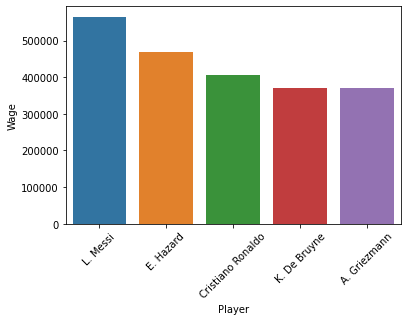

In [77]:
chart_data =df[["short_name","wage_eur","overall"]].nlargest(5,"wage_eur")
indexes = chart_data["short_name"].values
values = chart_data["wage_eur"].values
p = sns.barplot(
    x=indexes,
    y=values
)
p.set_xlabel("Player")
p.set_ylabel("Wage")
plt.xticks(rotation=45)
plt.show()

10. Show top 10 records of Germany.

In [80]:
df[df["nationality"]=="Germany"].nlargest(10,"overall")

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
109,235790,https://sofifa.com/player/235790/kai-havertz/2...,K. Havertz,Kai Havertz,20,1999-06-11,188,83,Germany,Bayer 04 Leverkusen,...,65+2,63+2,63+2,63+2,65+2,62+2,54+2,54+2,54+2,62+2


11. Now show top 5 records of Germany players who have maximum height, weight and wages.

In [81]:
df[df["nationality"]=="Germany"].nlargest(5,"height_cm")

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,236831,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,...,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1217,200212,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4449,158657,https://sofifa.com/player/158657/thomas-kessle...,T. Kessler,Thomas Kessler,33,1986-01-20,197,92,Germany,1. FC Köln,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df[df["nationality"]=="Germany"].nlargest(5,"weight_kg")

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1389,199833,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13576,239746,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,179783,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
165,213331,https://sofifa.com/player/213331/jonathan-tah/...,J. Tah,Jonathan Tah,23,1996-02-11,195,97,Germany,Bayer 04 Leverkusen,...,70+2,76+2,76+2,76+2,70+2,73+2,81+2,81+2,81+2,73+2


In [83]:
df[df["nationality"]=="Germany"].nlargest(5,"wage_eur")

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
146,186942,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,28,1990-10-24,180,80,Germany,Manchester City,...,76+3,79+3,79+3,79+3,76+3,74+3,72+3,72+3,72+3,74+3
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3


12. Show short name and wages of top 5 Germany players.

In [84]:
df[df["nationality"]=="Germany"][["short_name","wage_eur","overall"]].nlargest(5,"overall")

,short_name,wage_eur,overall
6,M. ter Stegen,250000,90
31,M. Neuer,155000,88
36,T. Kroos,330000,88
37,M. Reus,170000,88
49,M. Hummels,130000,87


13. Show top 5 players who have great shooting skills among all with short name.

In [85]:
df[["short_name","shooting"]].nlargest(5,"shooting")

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
19,L. Suárez,89.0


14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

In [88]:
df[["short_name","defending","nationality","club"]].nlargest(5,"defending")

,short_name,defending,nationality,club
7,V. van Dijk,90.0,Netherlands,Liverpool
16,G. Chiellini,90.0,Italy,Juventus
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter
49,M. Hummels,89.0,Germany,Borussia Dortmund


15. Show wages records of top 5 players of 'Real Madrid' team.

In [90]:
df[df["club"] == "Real Madrid"].nlargest(5,"overall")

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
28,192119,https://sofifa.com/player/192119/thibaut-court...,T. Courtois,Thibaut Courtois,27,1992-05-11,199,96,Belgium,Real Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3


16. Show shooting records of top 5 players of 'Real Madrid' team.

In [91]:
df[df["club"] == "Real Madrid"].nlargest(5,"shooting")

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
100,173731,https://sofifa.com/player/173731/gareth-bale/2...,G. Bale,Gareth Frank Bale,29,1989-07-16,185,82,Wales,Real Madrid,...,72+3,69+3,69+3,69+3,72+3,70+3,66+3,66+3,66+3,70+3
106,198710,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,27,1991-07-12,180,75,Colombia,Real Madrid,...,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
46,165153,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,1987-12-19,185,81,France,Real Madrid,...,62+3,62+3,62+3,62+3,62+3,58+3,54+3,54+3,54+3,58+3
161,232432,https://sofifa.com/player/232432/luka-jovic/20...,L. Jović,Luka Jović,21,1997-12-23,182,85,Serbia,Real Madrid,...,55+2,53+2,53+2,53+2,55+2,51+2,47+2,47+2,47+2,51+2


17. Show defending records of top 5 players of 'Real Madrid' team.

In [92]:
df[df["club"] == "Real Madrid"].nlargest(5,"defending")

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18,155862,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain,Real Madrid,...,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
42,200145,https://sofifa.com/player/200145/carlos-henriq...,Casemiro,Carlos Henrique Venancio Casimiro,27,1992-02-23,185,84,Brazil,Real Madrid,...,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
76,201535,https://sofifa.com/player/201535/raphael-varan...,R. Varane,Raphaël Varane,26,1993-04-25,191,81,France,Real Madrid,...,74+3,79+3,79+3,79+3,74+3,77+3,83+3,83+3,83+3,77+3
94,204963,https://sofifa.com/player/204963/daniel-carvaj...,Carvajal,Daniel Carvajal Ramos,27,1992-01-11,173,73,Spain,Real Madrid,...,83+3,82+3,82+3,82+3,83+3,83+3,80+3,80+3,80+3,83+3
277,200724,https://sofifa.com/player/200724/jose-ignacio-...,Nacho Fernández,José Ignacio Fernández Iglesias,29,1990-01-18,180,76,Spain,Real Madrid,...,77+2,76+2,76+2,76+2,77+2,78+2,80+2,80+2,80+2,78+2


18. Show nationality records of top 5 players of 'Real Madrid' team

In [93]:
df[df["club"] == "Real Madrid"][["short_name","nationality","overall"]].nlargest(5,"overall")

,short_name,nationality,overall
4,E. Hazard,Belgium,91
8,L. Modrić,Croatia,90
18,Sergio Ramos,Spain,89
28,T. Courtois,Belgium,88
36,T. Kroos,Germany,88


Bonus – Can go to beyond the scope of this project and find out some great results
from the data set. Extract more information of players according to your wish.

Average performance ratings

In [97]:
df[["overall","shooting","defending",'age','height_cm','weight_kg','potential','wage_eur','value_eur','passing','dribbling','pace']].mean().round(2)

overall           66.24
shooting          52.30
defending         51.55
age               25.28
height_cm        181.36
weight_kg         75.28
potential         71.55
wage_eur        9456.94
value_eur    2484037.64
passing           57.23
dribbling         62.53
pace              67.70
dtype: float64

effect of height on ratings

<AxesSubplot:xlabel='overall', ylabel='height_cm'>

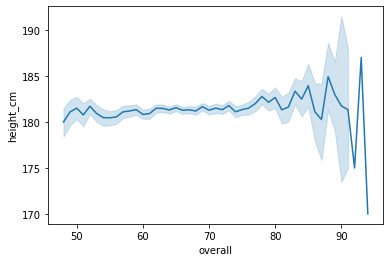

In [100]:

sns.lineplot(
    data=df[["overall","height_cm"]],
    x="overall",
    y="height_cm"
)

Height doesn't effect the Overall performance much lets see the effect on individual stats

<AxesSubplot:xlabel='shooting', ylabel='height_cm'>

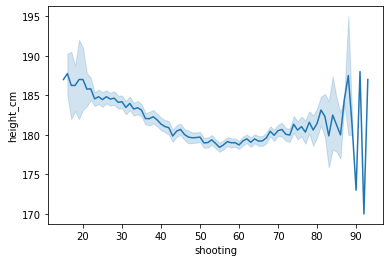

In [101]:
sns.lineplot(
    data=df[["shooting","height_cm"]],
    x="shooting",
    y="height_cm"
)

<AxesSubplot:xlabel='defending', ylabel='height_cm'>

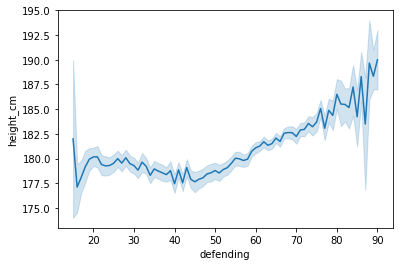

In [102]:
sns.lineplot(
    data=df[["defending","height_cm"]],
    x="defending",
    y="height_cm"
)

Height seems to make a big difference when defending 

What about age does it have an effect?

<AxesSubplot:xlabel='overall', ylabel='age'>

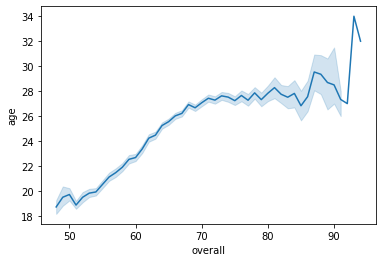

In [104]:
sns.lineplot(
    data=df[["overall","age"]],
    x="overall",
    y="age"
)

Age seems to have a big effect on the overall skill of players But lets check the individual skills in case they don't line up

<AxesSubplot:xlabel='shooting', ylabel='age'>

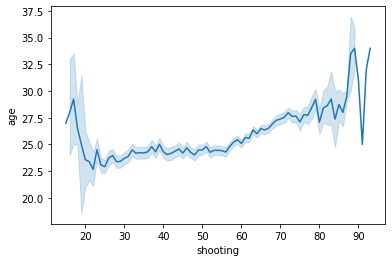

In [105]:
sns.lineplot(
    data=df[["shooting","age"]],
    x="shooting",
    y="age"
)

<AxesSubplot:xlabel='defending', ylabel='age'>

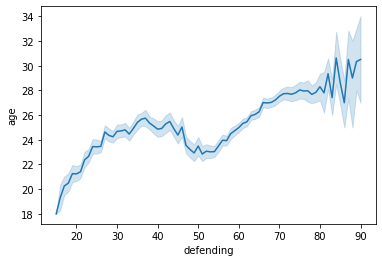

In [106]:
sns.lineplot(
    data=df[["defending","age"]],
    x="defending",
    y="age"
)

<AxesSubplot:xlabel='passing', ylabel='age'>

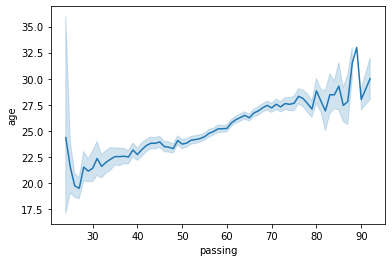

In [107]:
sns.lineplot(
    data=df[["passing","age"]],
    x="passing",
    y="age"
)

<AxesSubplot:xlabel='pace', ylabel='age'>

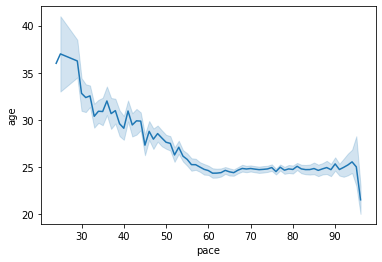

In [108]:
sns.lineplot(
    data=df[["pace","age"]],
    x="pace",
    y="age"
)

While age tends to make you better in almost every skill pace seems to go down as people get older which isn't a surprise

Lets take a look at what is the most valuable skills

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

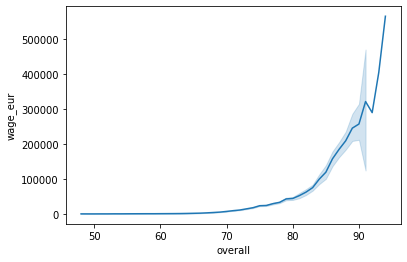

In [109]:
sns.lineplot(
    data=df[["overall","wage_eur"]],
    x="overall",
    y="wage_eur"
)

No surprise here The better a player is overall the more they get paid

<AxesSubplot:xlabel='potential', ylabel='wage_eur'>

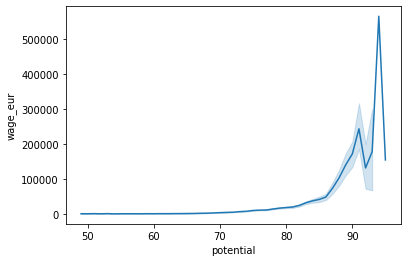

In [110]:
sns.lineplot(
    data=df[["potential","wage_eur"]],
    x="potential",
    y="wage_eur"
)

No real surprises since teams are more likely to pay for someone with the potential to be great

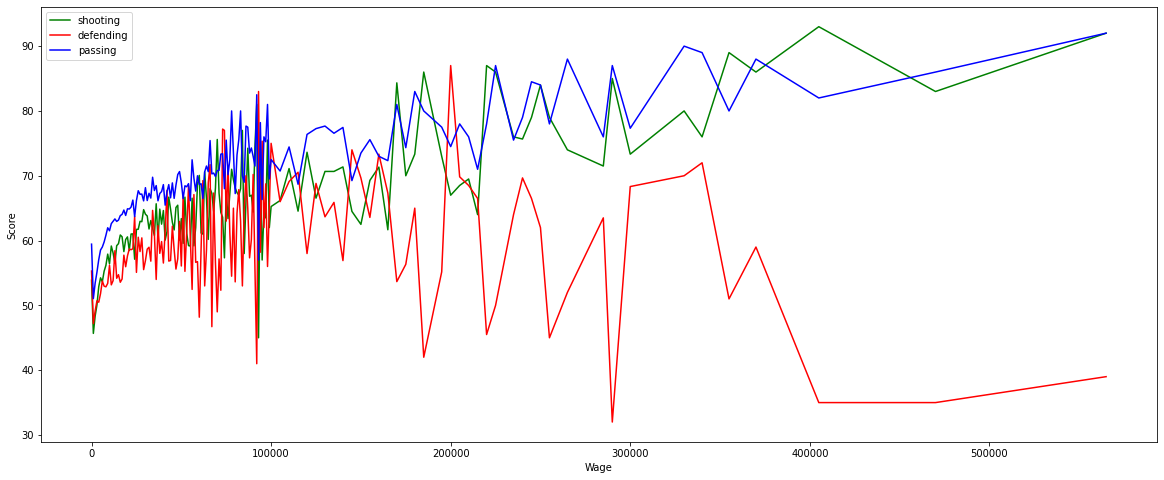

In [141]:
plt.figure(figsize=(20, 8))
graph_data = df[["shooting","defending","passing","wage_eur"]]
a = sns.lineplot(
    data=graph_data,
    x="wage_eur",
    y="shooting",
    color="green",
    label="shooting",
    ci=None
)
sns.lineplot(
    data=graph_data,
    x="wage_eur",
    y="defending",
    color="red",
    label="defending",
    ci=None
)
sns.lineplot(
    data=graph_data,
    x="wage_eur",
    y="passing",
    color="blue",
    label="passing",
    ci=None
)
a.set_ylabel("Score")
a.set_xlabel("Wage")
plt.show()

It would seem defending is a less valued skill then shooting and passing